In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
fpath = "/work/Katherine.Turner/smaller_projects/hifreq-variability/data"

In [3]:
mod = "ESM4_cmip"

ds_storms = xr.open_dataset(f"{fpath}/{mod}_monthly_storms.nc", use_cftime=True)
ds_SAM_djf = xr.open_dataset(f"{fpath}/{mod}_DJF_SAM.nc", use_cftime=True)
ds_SAM_jja = xr.open_dataset(f"{fpath}/{mod}_JJA_SAM.nc", use_cftime=True)
ds_NINO = xr.open_dataset(f"{fpath}/{mod}_nino34.nc", use_cftime=True)

In [6]:
storms_seasonal = ds_storms.center_counts.resample(time="QS-DEC").sum()
idx_jja = storms_seasonal.time.dt.month == 6
idx_djf = storms_seasonal.time.dt.month == 12

storms_djf = storms_seasonal[idx_djf][1:-1]
storms_jja = storms_seasonal[idx_jja]

lo_djf = storms_djf.sortby(storms_djf).time[:50]
hi_djf = storms_djf.sortby(storms_djf).time[-50:]

idx_hi_djf = storms_djf.time.isin(hi_djf)
idx_lo_djf = storms_djf.time.isin(lo_djf)

lo_jja = storms_jja.sortby(storms_jja).time[:50]
hi_jja = storms_jja.sortby(storms_jja).time[-50:]

idx_hi_jja = storms_jja.time.isin(hi_jja)
idx_lo_jja = storms_jja.time.isin(lo_jja)

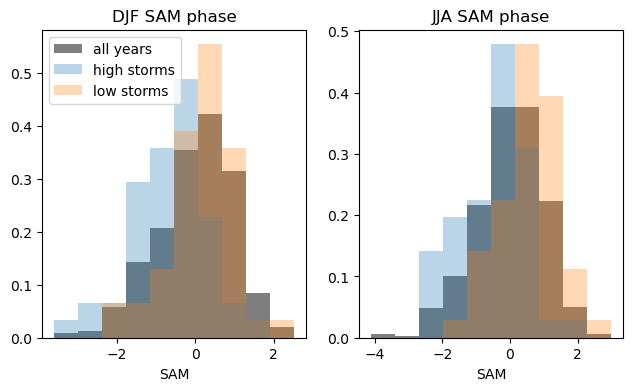

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[7.5, 4])

_, bins_n, _ = ds_SAM_djf.pcs[:, 0].plot.hist(
    ax=axs[0], color="k", alpha=0.5, density=True, label='all years'
)
ds_SAM_djf.pcs[ds_SAM_djf.time.dt.year.isin(hi_djf.dt.year), 0].plot.hist(
    ax=axs[0], alpha=0.3, density=True, bins=bins_n, label='high storms', 
)
ds_SAM_djf.pcs[ds_SAM_djf.time.dt.year.isin(lo_djf.dt.year), 0].plot.hist(
    ax=axs[0], alpha=0.3, density=True, bins=bins_n, label='low storms',
)
axs[0].legend(loc='upper left')
axs[0].set_title('DJF SAM phase')

_, bins_n, _ = ds_SAM_jja.pcs[:, 0].plot.hist(
    ax=axs[1], color="k", alpha=0.5, density=True
)
ds_SAM_jja.pcs[ds_SAM_jja.time.dt.year.isin(hi_jja.dt.year), 0].plot.hist(
    ax=axs[1], alpha=0.3, density=True, bins=bins_n
)
ds_SAM_jja.pcs[ds_SAM_jja.time.dt.year.isin(lo_jja.dt.year), 0].plot.hist(
    ax=axs[1], alpha=0.3, density=True, bins=bins_n
)
axs[1].set_title('JJA SAM phase')

for i in range(2):
    axs[i].set_xlabel('SAM')

In [4]:
djf_storms = ds_storms.center_counts.resample(time="QS-DEC").sum()[4:-4:4]
djf_SAM = ds_SAM_djf.pcs[1:-1, 0]
djf_nino = ds_NINO.nino34.resample(time="QS-DEC").mean()[4:-4:4]

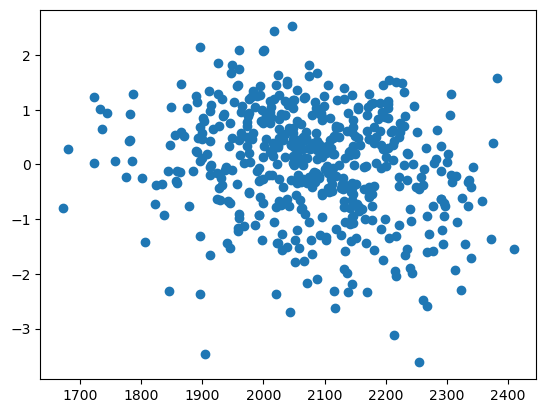

In [12]:
plt.scatter(djf_storms, djf_SAM)

In [36]:
np.corrcoef(djf_storms, djf_SAM), np.corrcoef(djf_storms, djf_nino), np.corrcoef(
    djf_nino, djf_SAM
)

(array([[ 1.        , -0.26797075],
        [-0.26797075,  1.        ]]),
 array([[1.        , 0.10594664],
        [0.10594664, 1.        ]]),
 array([[ 1.        , -0.02185223],
        [-0.02185223,  1.        ]]))

In [37]:
jja_storms = ds_storms.center_counts.resample(time="QS-DEC").sum()[2::4]
jja_SAM = ds_SAM_jja.pcs[:, 0]
jja_nino = ds_NINO.nino34.resample(time="QS-DEC").mean()[2::4]

In [38]:
np.corrcoef(jja_storms, jja_SAM), np.corrcoef(jja_storms, jja_nino), np.corrcoef(
    jja_nino, jja_SAM
)

(array([[ 1.        , -0.24273115],
        [-0.24273115,  1.        ]]),
 array([[1.        , 0.01536312],
        [0.01536312, 1.        ]]),
 array([[1.       , 0.1681654],
        [0.1681654, 1.       ]]))